# Week08 Data Preprocessing

---
p4

# 1. Dealing with missing data

### Sample data

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('sample-missing-data.csv')
df

,A,B,C,label
0,1,0.1,10.0,0
1,2,0.2,20.0,0
2,2,0.1,NaN,1
3,3,0.3,20.0,1
4,2,0.2,NaN,0


### Removing a feature

In [2]:
df.drop("A",axis=1)
#df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

,B,C,label
0,0.1,10.0,0
1,0.2,20.0,0
2,0.1,NaN,1
3,0.3,20.0,1
4,0.2,NaN,0


---
p5

### Removing data with missing values

In [3]:
# check missing values
df.isnull().sum()

A        0
B        0
C        2
label    0
dtype: int64

In [4]:
# remove rows that contain missing values
df.dropna(axis=0)

,A,B,C,label
0,1,0.1,10.0,0
1,2,0.2,20.0,0
3,3,0.3,20.0,1


In [5]:
# remove colomns that contain missing values
df.dropna(axis=1)

,A,B,label
0,1,0.1,0
1,2,0.2,0
2,2,0.1,1
3,3,0.3,1
4,2,0.2,0


---
p6

### Imputing missing values 

In [6]:
# Impute using pandas
df.fillna(df.mean())

,A,B,C,label
0,1,0.1,10.000000,0
1,2,0.2,20.000000,0
2,2,0.1,16.666667,1
3,3,0.3,20.000000,1
4,2,0.2,16.666667,0


---
p7

In [7]:
df.values

array([[ 1. ,  0.1, 10. ,  0. ],
       [ 2. ,  0.2, 20. ,  0. ],
       [ 2. ,  0.1,  nan,  1. ],
       [ 3. ,  0.3, 20. ,  1. ],
       [ 2. ,  0.2,  nan,  0. ]])

In [8]:
# Impute using scikit-learn
# sklearn v0.18
#from sklearn.preprocessing import Imputer
#imr = Imputer(missing_values='NaN',strategy='mean',axis=0)

# # sklearn >= v0.20
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan,strategy='mean')


imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1.        ,  0.1       , 10.        ,  0.        ],
       [ 2.        ,  0.2       , 20.        ,  0.        ],
       [ 2.        ,  0.1       , 16.66666667,  1.        ],
       [ 3.        ,  0.3       , 20.        ,  1.        ],
       [ 2.        ,  0.2       , 16.66666667,  0.        ]])

---
p8

# 2. Handling categorical feature values

### Sample data 
- color : norminal
- size : ordinal  

In [9]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class3'],
                   ['red', 'M', 14.5, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class1
2,blue,XL,15.3,class3
3,red,M,14.5,class2


---
p9

### Encoding class labels - scikit-learn

In [10]:
from sklearn.preprocessing import LabelEncoder

# Label encoding using sklearn
le = LabelEncoder()
df['classlabel'] = le.fit_transform(df['classlabel'])
df

,color,size,price,classlabel
0,green,M,10.1,0
1,red,L,13.5,0
2,blue,XL,15.3,2
3,red,M,14.5,1


---
p10

### Encoding ordinal features - pandas 

In [11]:
# encoding ordinal features using pandas
size_mapping = {'M':0,'L':1,'XL':2}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,0,10.1,0
1,red,1,13.5,0
2,blue,2,15.3,2
3,red,0,14.5,1


---
p11

### One-hot encoding of nominal features - pandas

In [12]:
# one-hot encoding via pandas
pd.get_dummies(df,columns=['color'])

,size,price,classlabel,color_blue,color_green,color_red
0,0,10.1,0,0,1,0
1,1,13.5,0,0,0,1
2,2,15.3,2,1,0,0
3,0,14.5,1,0,0,1


---
p12

### One-hot encoding of nominal features - scikit learn

In [13]:
# Convert pd.DataFrame object to np.array object
X = df[['color','size','price']].values
X

array([['green', 0, 10.1],
       ['red', 1, 13.5],
       ['blue', 2, 15.3],
       ['red', 0, 14.5]], dtype=object)

---
p13

In [14]:
# sklearn v0.18
# Step 1) Convert 'color' feature data type string to integer 
from sklearn.preprocessing import LabelEncoder

# label encoding
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:,0])
print(X)

# Step 2) One-hot encode 'color' feature
from sklearn.preprocessing import OneHotEncoder
# one-hot encoding using scikit-learn
ohe = OneHotEncoder(categorical_features=[0],sparse=False)
X = ohe.fit_transform(X)
print(X)

[[1 0 10.1]
 [2 1 13.5]
 [0 2 15.3]
 [2 0 14.5]]


TypeError: __init__() got an unexpected keyword argument 'categorical_features'

---
p14

In [15]:
# sklearn >= v0.20
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# ColumnTransformer helps you select which column(feature) you want to transform
# In sklearn >= v0.20, OneHotEncoder() can directly transform string type features 
 # ("process name", transformer, columns(np.array : column idx, pd.DataFrame : column name ))
ct = ColumnTransformer([("Ohe",OneHotEncoder(),[0])],
                       remainder='passthrough')
X = ct.fit_transform(X)
X

array([[0.0, 1.0, 0.0, 0, 10.1],
       [0.0, 0.0, 1.0, 1, 13.5],
       [1.0, 0.0, 0.0, 2, 15.3],
       [0.0, 0.0, 1.0, 0, 14.5]], dtype=object)

---
p15

# 3. Transformation of numerical feature values

### Loading Wine Dataset

In [16]:
import pandas as pd
import numpy as np

df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


---
p16

### Get X and y. Splitting data into 70% training & 30% test 

In [17]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

In [18]:
X_train.shape

(124, 13)

In [19]:
y_train.shape

(124,)

---
p17

### Normalization

In [20]:
from sklearn.preprocessing import MinMaxScaler

# transform to min 0, max 1
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [21]:
print(X_train[0:3, 0:5])
print('max[0] = %.2f \n' % X_train[:,0].max())
print(X_train_norm[0:3, 0:5])
print('max[0] = %.2f \n' % X_train_norm[:,0].max())

[[ 13.62   4.95   2.35  20.    92.  ]
 [ 13.76   1.53   2.7   19.5  132.  ]
 [ 13.73   1.5    2.7   22.5  101.  ]]
max[0] = 14.83 

[[0.64619883 0.83201581 0.4248366  0.46236559 0.27160494]
 [0.6871345  0.15612648 0.65359477 0.43548387 0.7654321 ]
 [0.67836257 0.15019763 0.65359477 0.59677419 0.38271605]]
max[0] = 1.00 



---
p18

### Standardization

In [22]:
from sklearn.preprocessing import StandardScaler

# transform to mean 0, variance 1
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [23]:
print(X_train[0:3, 0:5])
print('mean[0] = %.2f \n' % X_train[:,0].mean())
print(X_train_std[0:3, 0:5])
print('mean[0] = %.2f \n' % X_train_std[:,0].mean())

[[ 13.62   4.95   2.35  20.    92.  ]
 [ 13.76   1.53   2.7   19.5  132.  ]
 [ 13.73   1.5    2.7   22.5  101.  ]]
mean[0] = 13.03 

[[ 0.71225893  2.22048673 -0.13025864  0.05962872 -0.50432733]
 [ 0.88229214 -0.70457155  1.17533605 -0.09065504  2.34147876]
 [ 0.84585645 -0.73022996  1.17533605  0.81104754  0.13597904]]
mean[0] = 0.00 



---
p19

# 4. Feature selection

### Select Meaningful Features using information gain

In [24]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print('Training accuracy:', tree.score(X_train, y_train))
print('Test accuracy:', tree.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy: 0.9444444444444444


In [25]:
feature_labels = df_wine.columns[1:]
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d. %-30s %f" % (f+1, 
                             feature_labels[indices[f]], 
                             importances[indices[f]]))

 1. Proline                        0.439462
 2. Flavanoids                     0.397143
 3. Color intensity                0.105658
 4. Alcalinity of ash              0.023926
 5. Alcohol                        0.017451
 6. Nonflavanoid phenols           0.016360
 7. OD280/OD315 of diluted wines   0.000000
 8. Hue                            0.000000
 9. Proanthocyanins                0.000000
10. Total phenols                  0.000000
11. Magnesium                      0.000000
12. Ash                            0.000000
13. Malic acid                     0.000000


---
p20

### Select Meaningful Features using L1 regularization

In [26]:
from sklearn.linear_model import LogisticRegression

# Logistic regression with almost no regularization. Lamda = 0.0001
# C=inverse of lambda. Note that C=1.0 is the default
lr = LogisticRegression(penalty='l1', C=10000, solver='liblinear') 
lr.fit(X_train_std, y_train)

print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


---
p21

In [27]:
lr.coef_

array([[  8.58370469,   2.08048557,   4.53799361,  -7.03588647,
          1.03880417,   0.4219813 ,   5.64291772,   0.28309824,
          1.25397671,  -1.90607802,  -1.94517709,   3.53803617,
          9.10516581],
       [ -7.6707961 ,  -3.50566404,  -8.63880361,   4.62808473,
         -0.83637555,  -0.35781493,   6.03844062,   3.14385012,
         -0.94099401, -20.85289029,   6.47808582,   1.38828164,
        -18.10566537],
       [  5.07852733,   0.85733255,   4.5399187 ,   0.27354566,
         -0.02499161,   1.06734529, -10.48568071,  -2.49027018,
         -2.3717939 ,  10.02946787,  -7.68735218,  -3.75821813,
          0.83027101]])

---
p22

In [28]:
from sklearn.linear_model import LogisticRegression

# Logistic regression with L1 regularization. Lamda = 1
lr = LogisticRegression(penalty='l1', C=1, solver='liblinear')
lr.fit(X_train_std, y_train)

print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


---
p23

In [29]:
lr.coef_

array([[ 1.24595077,  0.18006612,  0.74660652, -1.16387933,  0.        ,
         0.        ,  1.15886682,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55798138,  2.50864625],
       [-1.53709398, -0.38719161, -0.99536584,  0.36519536, -0.05964658,
         0.        ,  0.66824842,  0.        ,  0.        , -1.93410184,
         1.23332211,  0.        , -2.23154571],
       [ 0.13561439,  0.16855427,  0.35719908,  0.        ,  0.        ,
         0.        , -2.43717153,  0.        ,  0.        ,  1.56373544,
        -0.81855763, -0.49271327,  0.        ]])

In [30]:
lr.coef_[lr.coef_==0].shape

(16,)

---
p25

# 5. Dimensionality Reduction

### Loading Wine Dataset

In [31]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


---
p26

### Get X and y. Splitting data into 70% training & 30% test 

In [32]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

---
p27

### Principal Component Analysis using numpy 

In [33]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [34]:
X_train_std.shape

(124, 13)

In [35]:
import numpy as np

# covariance matrix of X
cov_mat = np.cov(X_train_std.T)
cov_mat

array([[ 1.00813008,  0.06709556,  0.17405351, -0.35439069,  0.26374703,
         0.29079481,  0.21835807, -0.08111974,  0.10436705,  0.54282846,
         0.05893536, -0.01797029,  0.6415292 ],
       [ 0.06709556,  1.00813008,  0.08326463,  0.26356776, -0.11349172,
        -0.33735555, -0.41035281,  0.33653916, -0.21602672,  0.17504154,
        -0.551593  , -0.40561695, -0.24089991],
       [ 0.17405351,  0.08326463,  1.00813008,  0.46420355,  0.29092834,
         0.18020384,  0.15537535,  0.15918823, -0.00703776,  0.20549146,
         0.00665422,  0.02039019,  0.223495  ],
       [-0.35439069,  0.26356776,  0.46420355,  1.00813008, -0.07406447,
        -0.28060672, -0.31391899,  0.31581353, -0.24621059, -0.08872685,
        -0.22595587, -0.16799906, -0.46393412],
       [ 0.26374703, -0.11349172,  0.29092834, -0.07406447,  1.00813008,
         0.25667578,  0.21025773, -0.26003426,  0.19601657,  0.20606456,
         0.13359768,  0.06633258,  0.41810999],
       [ 0.29079481, -0.337355

In [36]:
cov_mat.shape

(13, 13)

---
p28

In [37]:
# eigenvalues and eigenvectors of covariance matrix
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)
print('\nEigenvectors \n%s' % eigen_vecs)


Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]

Eigenvectors 
[[-1.37242175e-01  5.03034778e-01 -1.37748734e-01 -3.29610003e-03
  -2.90625226e-01  2.99096847e-01  7.90529293e-02 -3.68176414e-01
  -3.98377017e-01 -9.44869777e-02  3.74638877e-01 -1.27834515e-01
   2.62834263e-01]
 [ 2.47243265e-01  1.64871190e-01  9.61503863e-02  5.62646692e-01
   8.95378697e-02  6.27036396e-01 -2.74002014e-01 -1.25775752e-02
   1.10458230e-01  2.63652406e-02 -1.37405597e-01  8.06401578e-02
  -2.66769211e-01]
 [-2.54515927e-02  2.44564761e-01  6.77775667e-01 -1.08977111e-01
  -1.60834991e-01  3.89128239e-04  1.32328045e-01  1.77578177e-01
   3.82496856e-01  1.42747511e-01  4.61583035e-01  1.67924873e-02
  -1.15542548e-01]
 [ 2.06945084e-01 -1.13529045e-01  6.25040550e-01  3.38187002e-02
   5.15873402e-02 -4.05836452e-02  2.23999097e-01 -4.40592110e-01
  -2.43373853e-01 -1.30485780e-01 -4.18953

In [38]:
eigen_vecs.shape

(13, 13)

---
p29

### projection to new 13 dimensions 

In [39]:
X_train_pca = X_train_std.dot(eigen_vecs)

In [40]:
X_train_std[0]

array([ 0.71225893,  2.22048673, -0.13025864,  0.05962872, -0.50432733,
       -0.52831584, -1.24000033,  0.84118003, -1.05215112, -0.29218864,
       -0.20017028, -0.82164144, -0.62946362])

In [41]:
X_train_pca[0]

array([ 2.38299011,  0.45458499, -0.22703207,  0.57988399, -0.57994169,
        1.73317476, -0.70180475, -0.21617248, -0.23666876,  0.40161994,
        0.16548767, -0.23489704, -0.29726982])

---
p30

### projection to 2 dimensions corresponding to 2 largest eigenvalues

In [42]:
w = eigen_vecs[:,[0,1]]
w

array([[-0.13724218,  0.50303478],
       [ 0.24724326,  0.16487119],
       [-0.02545159,  0.24456476],
       [ 0.20694508, -0.11352904],
       [-0.15436582,  0.28974518],
       [-0.39376952,  0.05080104],
       [-0.41735106, -0.02287338],
       [ 0.30572896,  0.09048885],
       [-0.30668347,  0.00835233],
       [ 0.07554066,  0.54977581],
       [-0.32613263, -0.20716433],
       [-0.36861022, -0.24902536],
       [-0.29669651,  0.38022942]])

In [43]:
X_train_pca = X_train_std.dot(w)

In [44]:
X_train_std[0]

array([ 0.71225893,  2.22048673, -0.13025864,  0.05962872, -0.50432733,
       -0.52831584, -1.24000033,  0.84118003, -1.05215112, -0.29218864,
       -0.20017028, -0.82164144, -0.62946362])

In [45]:
X_train_pca[0]

array([2.38299011, 0.45458499])

---
p31

### Principal Component Analysis using scikit-learn

In [46]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)

In [47]:
X_train_std[0]

array([ 0.71225893,  2.22048673, -0.13025864,  0.05962872, -0.50432733,
       -0.52831584, -1.24000033,  0.84118003, -1.05215112, -0.29218864,
       -0.20017028, -0.82164144, -0.62946362])

In [48]:
X_train_pca[0]

array([ 2.38299011,  0.45458499, -0.22703207,  0.57988399, -0.57994169,
       -1.73317476,  0.70180475,  0.21617248, -0.23666876, -0.16548767,
        0.29726982,  0.23489704, -0.40161994])

---
p32

### Explained variance ratio for each component 

In [49]:
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

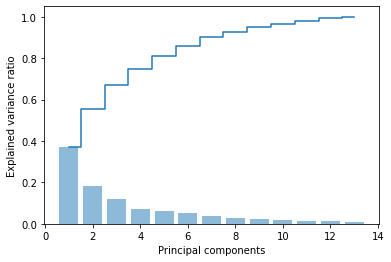

In [50]:
import matplotlib.pyplot as plt

plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

---
p33

### Projection to 2 dimensions

In [51]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [52]:
X_train_std[0]

array([ 0.71225893,  2.22048673, -0.13025864,  0.05962872, -0.50432733,
       -0.52831584, -1.24000033,  0.84118003, -1.05215112, -0.29218864,
       -0.20017028, -0.82164144, -0.62946362])

In [53]:
X_train_pca[0]

array([2.38299011, 0.45458499])

---
p34

### Visualizing data in 2 dimensions with PC1 and PC2

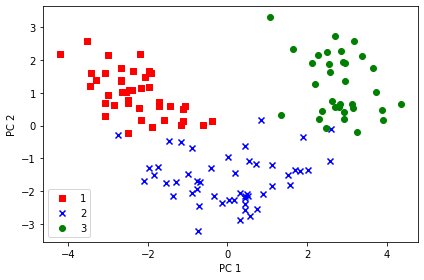

In [54]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_03.png', dpi=300)
plt.show()

---
p35

### Logistic regression with 2 dimensional data

In [55]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = lr.fit(X_train_pca,y_train)

In [56]:
acc = lr.score(X_train_pca, y_train)
print("Train accuracy : %.4f" % acc)

Train accuracy : 0.9839


In [57]:
acc = lr.score(X_test_pca, y_test)
print("Test accuracy : %.4f" % acc)

Test accuracy : 0.9259


---
p36

### Decision boundary

In [58]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


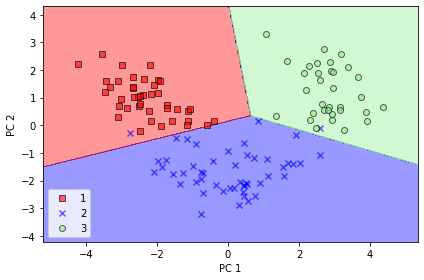

In [59]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()

plt.show()

---
p37

# Submit
- To make sure if you have completed this practice, Submit your practice file(Week08_givencode.ipynb) to e-class.
- **Deadline : tomorrow 11:59pm**
- Modify your ipynb file name as **“Week08_StudentNum_Name.ipynb”**
  - ```Ex) Week08_2020123456_홍길동.ipynb``` 
- You can upload this file without taking the quiz, but **homework is provided like a quiz every three weeks**, so it is recommended to take the quiz as well.

# Quiz : Kaggle Tutorial Competition
### Predict survival on the Titanic
- Data Preprocessing
    1. Remove irrelavant features
    2. Convert categorical features to numerical 
    3. Impute missing data
    4. Standardize numerical features
    5. Dimensionality Reduction by PCA on numerical features  
    
    
- Build and Evaluate Models
    - Logistic Regression
    - Decision Tree
    - Gaussian Naïve Bayes
    - K-Nearest Neighbors
    - Multilayer Neural Network
    
    
- Data Dictionary (891 samples)
  - **Pclass** : Ticket class : 1 = 1st, 2 = 2nd, 3 = 3rd
  - **Sex** : 'male', 'female'
  - **Age** : Age in years
  - **SibSp** : Number of Siblings / Spouses aboard the Titanic
  - **Parch** : Number of Parents / Children aboard the Titanic
  - **Ticket** : Ticker Number
  - **Fare** : Passenger fare
  - **Cabin** : Cabin number
  - **Embarked** : Port of Embarkation : C = Cherbourg, Q = Queentown, S = Southampton
- target : **Survived** : 0 = No, 1 = Yes
- https://www.kaggle.com/c/titanic/data![image.png](attachment:image.png)![image.png](attachment:image.png)

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Dataset

In [137]:
# read titanic.csv
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [138]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Removing irrelavant features
   - PassengerId, Name, Ticket, Cabin

In [139]:
# remove irrelavant feafures
df_select = None
df_select.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


### Handling categorical features
- Nominal feature :  
   - Sex : encode to 0, 1  
   - Embarked : one-hot encoding  
- Ordinal feature : 
    - Pclass(already mapped(integer vlaue))

In [140]:
from sklearn.preprocessing import LabelEncoder

# label encoding "Sex"
le = None
df_select["Sex"] = None
df_select.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S


In [141]:
# one-hot encoding "Embarked"
df_select = None
df_select.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1


### Handling missing values
- Impute mmissing values
    - Age

In [142]:
# Check missing value ratio
None

Survived      0.000000
Pclass        0.000000
Sex           0.000000
Age           0.198653
SibSp         0.000000
Parch         0.000000
Fare          0.000000
Embarked_C    0.000000
Embarked_Q    0.000000
Embarked_S    0.000000
dtype: float64

In [143]:
# Impute missing values
df_select = None
None

Survived      0.0
Pclass        0.0
Sex           0.0
Age           0.0
SibSp         0.0
Parch         0.0
Fare          0.0
Embarked_C    0.0
Embarked_Q    0.0
Embarked_S    0.0
dtype: float64

### Standardizing numerical features
- Age, SibSp, Parch, Fare
- Standardize based on training set

In [144]:
from sklearn.model_selection import train_test_split

# split the dataset by index
idx = df_select.index 
train_idx, test_idx = train_test_split(idx, test_size=0.3, random_state=0, stratify=df_select["Survived"])

In [145]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# fit to train set
None

# transform entire data set using train set info(mean, std)
None
df_select.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,-0.588800,0.449557,-0.479735,-0.488829,0,0,1
1,1,1,0,0.657119,0.449557,-0.479735,0.695553,1,0,0
2,1,3,0,-0.277320,-0.480922,-0.479735,-0.476344,0,0,1


### Dimensionality reduction by PCA
- Apply PCA to numerical features 
- Use training data

In [146]:
from sklearn.decomposition import PCA

# PCA
pca = None
# Note : Fit to train set
None

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [147]:
# check explained variance 
np.cumsum(pca.explained_variance_ratio_)

array([0.41189633, 0.6809093 , 0.85531871, 1.        ])

In [148]:
# transform [Age, SibSp, Parch, Fare] to [PC1, PC2]
pc12 = None
df_pc12 = pd.DataFrame(pc12, columns=["PC1", "PC2"])
df_pc12.head()

,PC1,PC2
0,0.083426,-0.802923
1,-0.092440,0.892115
2,-0.611231,-0.569906
3,-0.091341,0.485317
4,-0.895380,-0.133483


In [149]:
# Drop original numeric features
df_select = None

# Concat dataframe with PC1, PC2
df_reduced = None
df_reduced.head()

,Survived,Pclass,Sex,Embarked_C,Embarked_Q,Embarked_S,PC1,PC2
0,0,3,1,0,0,1,0.083426,-0.802923
1,1,1,0,1,0,0,-0.092440,0.892115
2,1,3,0,0,0,1,-0.611231,-0.569906
3,1,1,0,0,0,1,-0.091341,0.485317
4,0,3,1,0,0,1,-0.895380,-0.133483


### Get X and y

In [150]:
# Train set / Test set 
y_train = df_reduced.loc[train_idx].values[:,0]
y_test = df_reduced.loc[test_idx].values[:,0]

X_train = df_reduced.loc[train_idx].values[:,1:]
X_test = df_reduced.loc[test_idx].values[:,1:]

X_train.shape

(623, 7)

### Model : Logistic Regression

In [151]:
from sklearn.linear_model import LogisticRegression
lr = None
lr.fit(X_train, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [152]:
print("Train accuracy : %.4f" % lr.score(X_train, y_train))
print("Test accuracy : %.4f" % lr.score(X_test, y_test))

Train accuracy : 0.7849
Test accuracy : 0.8060


### Model : Decision Tree Classifier

In [153]:
from sklearn.tree import DecisionTreeClassifier
tree = None
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [154]:
print("Train accuracy : %.4f" % tree.score(X_train, y_train))
print("Test accuracy : %.4f" % tree.score(X_test, y_test))

Train accuracy : 0.8299
Test accuracy : 0.8022


### Model : Gausssian Naive Bayes

In [155]:
from sklearn.naive_bayes import GaussianNB
gnb = None
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [156]:
print("Train accuracy : %.4f" % gnb.score(X_train, y_train))
print("Test accuracy : %.4f" % gnb.score(X_test, y_test))

Train accuracy : 0.7721
Test accuracy : 0.7910


### Model : K-Nearest Neighbors

In [157]:
from sklearn.neighbors import KNeighborsClassifier
knn = None
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='uniform')

In [158]:
print("Train accuracy : %.4f" % knn.score(X_train, y_train))
print("Test accuracy : %.4f" % knn.score(X_test, y_test))

Train accuracy : 0.8443
Test accuracy : 0.8209


### Model : Multilyaer Neural Network

In [159]:
from sklearn.neural_network import MLPClassifier
mlp = None
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.94610328
Iteration 2, loss = 0.78037881
Iteration 3, loss = 0.62463500
Iteration 4, loss = 0.59164093
Iteration 5, loss = 0.60522100
Iteration 6, loss = 0.59472752
Iteration 7, loss = 0.57562242
Iteration 8, loss = 0.56462565
Iteration 9, loss = 0.56070356
Iteration 10, loss = 0.55522959
Iteration 11, loss = 0.55004589
Iteration 12, loss = 0.54576842
Iteration 13, loss = 0.54184101
Iteration 14, loss = 0.53782372
Iteration 15, loss = 0.53373132
Iteration 16, loss = 0.53005038
Iteration 17, loss = 0.52572512
Iteration 18, loss = 0.52191522
Iteration 19, loss = 0.51761925
Iteration 20, loss = 0.51361056
Iteration 21, loss = 0.50918481
Iteration 22, loss = 0.50519952
Iteration 23, loss = 0.50225274
Iteration 24, loss = 0.49734468
Iteration 25, loss = 0.49306954
Iteration 26, loss = 0.48958302
Iteration 27, loss = 0.48487908
Iteration 28, loss = 0.48114139
Iteration 29, loss = 0.47909788
Iteration 30, loss = 0.47625363
Iteration 31, loss = 0.47303184
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='sgd',
              tol=1e-05, validation_fraction=0.1, verbose=1, warm_start=False)

In [160]:
print("Train accuracy : %.4f" % mlp.score(X_train, y_train))
print("Test accuracy : %.4f" % mlp.score(X_test, y_test))

Train accuracy : 0.8363
Test accuracy : 0.8209


### Model Evaluation

In [161]:
# get the accuracy of 5 models
models = [lr, tree, gnb, knn, mlp]
train_acc = []
test_acc = []
for m in models:
    train_acc.append(m.score(X_train, y_train))
    test_acc.append(m.score(X_test, y_test))

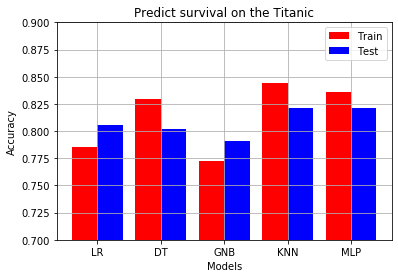

In [162]:
model_names = ["LR", "DT", "GNB", "KNN", "MLP"]
# note that it is 'a range' to position it nicely on x axis
ypos=np.arange(len(model_names))

# plot the accuracy of 5 models as bar chart
plt.bar(ypos-0.2, train_acc, width=0.4, label='Train', color='red')
plt.bar(ypos+0.2, test_acc, width=0.4, label='Test', color='blue')

plt.title('Predict survival on the Titanic')
plt.xticks(ypos, model_names)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0.7, 0.9)
plt.grid()

plt.show()